<a href="https://colab.research.google.com/github/Quincy17/IBM-Capstone_Project/blob/main/Project_IBM_Farrel_Caesarian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.0 MB/s eta 0:00:00


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/ispu_dki1.csv')

dataset.tail()

,tanggal,stasiun,pm25,pm10,so2,co,o3,no2,max,critical,categori
5168,2025-02-24,DKI1 (Bunderan HI),55.0,42.0,28.0,15.0,14.0,28.0,55.0,PM25,SEDANG
5169,2025-02-25,DKI1 (Bunderan HI),66.0,47.0,38.0,19.0,5.0,31.0,66.0,PM25,SEDANG
5170,2025-02-26,DKI1 (Bunderan HI),57.0,45.0,30.0,17.0,7.0,30.0,57.0,PM25,SEDANG
5171,2025-02-27,DKI1 (Bunderan HI),85.0,54.0,36.0,26.0,12.0,50.0,85.0,PM25,SEDANG
5172,2025-02-28,DKI1 (Bunderan HI),57.0,44.0,33.0,13.0,10.0,23.0,57.0,PM25,SEDANG


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5173 entries, 0 to 5172
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   5173 non-null   object 
 1   stasiun   5173 non-null   object 
 2   pm25      1146 non-null   float64
 3   pm10      4957 non-null   float64
 4   so2       4985 non-null   float64
 5   co        5005 non-null   float64
 6   o3        4964 non-null   float64
 7   no2       4974 non-null   float64
 8   max       5160 non-null   float64
 9   critical  5059 non-null   object 
 10  categori  5173 non-null   object 
dtypes: float64(7), object(4)
memory usage: 444.7+ KB


In [39]:
# 1. Mengubah 'tanggal' menjadi tipe datetime
dataset['tanggal'] = pd.to_datetime(dataset['tanggal'])
dataset.set_index('tanggal', inplace=True)
print("Kolom 'tanggal' berhasil diubah dan dijadikan index.")

Kolom 'tanggal' berhasil diubah dan dijadikan index.


In [40]:
# Kode ini akan menampilkan semua nama stasiun yang unik di kolom 'stasiun'
print("Nama-nama stasiun yang ada di dataset")
print(dataset['stasiun'].unique())

Nama-nama stasiun yang ada di dataset Anda:
['DKI1 (Bunderan HI)']


/tmp/ipython-input-777255364.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset[kolom_polutan] = dataset[kolom_polutan].fillna(method='ffill')


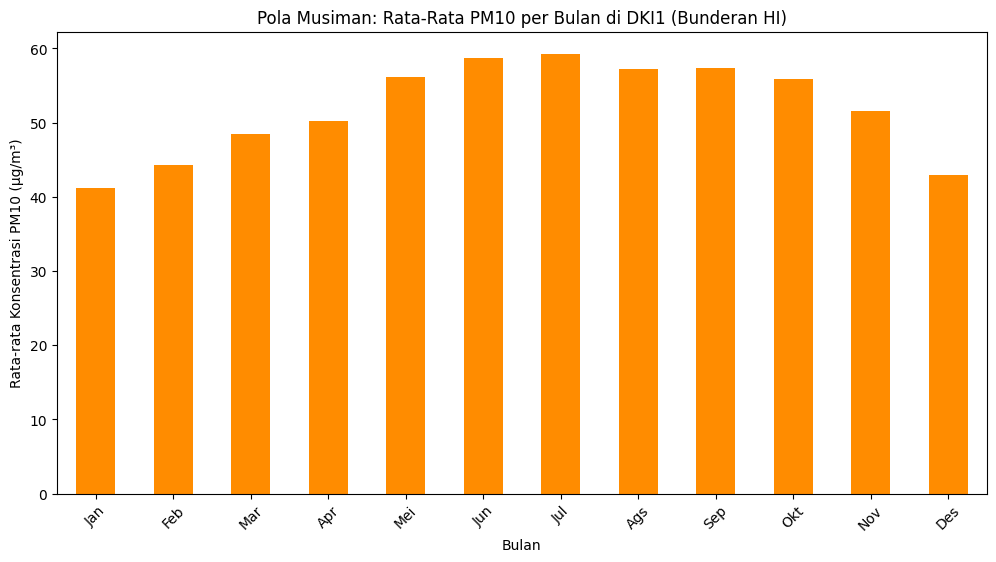

In [41]:
# 1. Pastikan nama stasiun pilihan Anda sudah benar
# Ganti dengan nama stasiun yang valid dari data Anda
nama_stasiun_pilihan = 'DKI1 (Bunderan HI)' # Ganti jika nama stasiun Anda berbeda

# 2. Filter 'dataset' untuk fokus pada satu stasiun
# Variabel 'dataset' akan ditimpa dengan data yang sudah terfilter
dataset = dataset[dataset['stasiun'] == nama_stasiun_pilihan].copy()

# 3. Proses pembersihan data pada 'dataset'
kolom_polutan = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
dataset[kolom_polutan] = dataset[kolom_polutan].fillna(method='ffill')

# 4. Buat kolom 'bulan' dari index tanggal pada 'dataset'
dataset['bulan'] = dataset.index.month

# 5. Hitung rata-rata PM10 per bulan dari 'dataset'
monthly_avg_pm10 = dataset.groupby('bulan')['pm10'].mean()

# 6. Plotting rata-rata bulanan
plt.figure(figsize=(12, 6))
monthly_avg_pm10.plot(kind='bar', color='darkorange')
plt.title(f'Pola Musiman: Rata-Rata PM10 per Bulan di {nama_stasiun_pilihan}')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Konsentrasi PM10 (µg/m³)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
plt.show()

Model untuk prediksi PM10 berhasil dilatih.
MAE (Mean Absolute Error) untuk PM10: 7.20


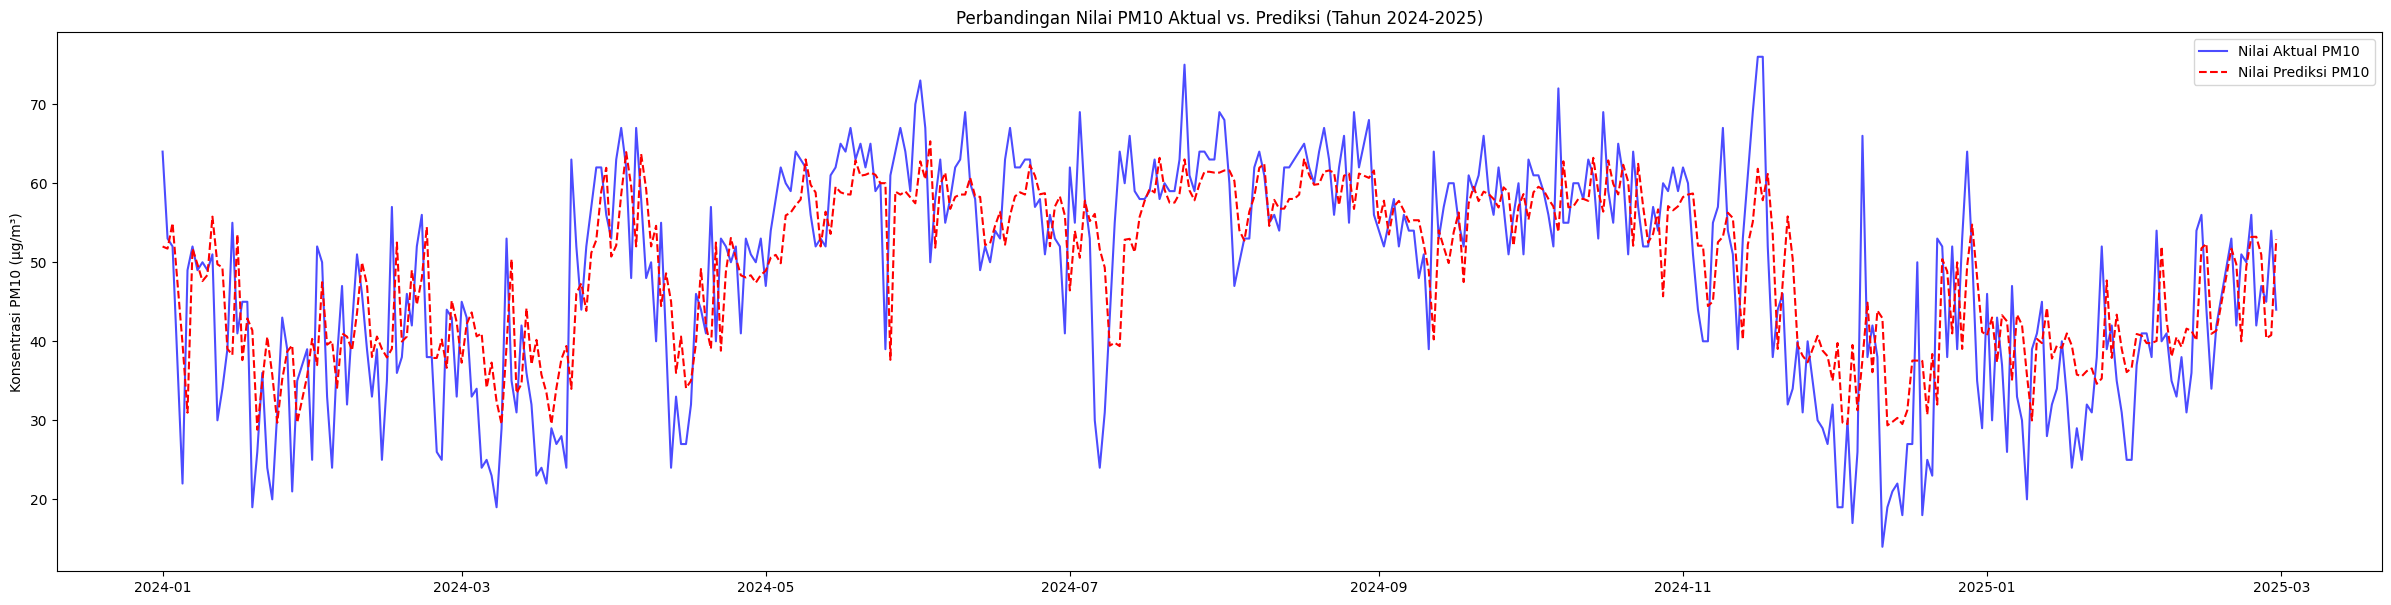

In [52]:
# 1. Feature Engineering untuk PM10
df_fokus['pm10_lag1'] = df_fokus['pm10'].shift(1)
df_fokus['pm10_rolling_mean7'] = df_fokus['pm10'].shift(1).rolling(window=7).mean()

df_model = df_fokus.dropna()

# 2. Definisi Fitur (X) dan Target (y)
# Mari kita gunakan lebih banyak fitur sekarang
features = ['pm10_lag1', 'pm10_rolling_mean7'] # Tambahkan 'so2_lag1', 'o3_lag1', dll. jika diinginkan
target = 'pm10'

X = df_model[features]
y = df_model[target]

# 3. Split Data secara Kronologis
split_date = '2024-01-01'
X_train = X.loc[X.index < split_date]
y_train = y.loc[y.index < split_date]
X_test = X.loc[X.index >= split_date]
y_test = y.loc[y.index >= split_date]

# 4. Latih Model XGBoost
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, objective='reg:squarederror', early_stopping_rounds=50)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

print("Model untuk prediksi PM10 berhasil dilatih.")

# 5. Evaluasi Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Mean Absolute Error) untuk PM10: {mae:.2f}")

# 6. Visualisasi Hasil Prediksi PM10
plt.figure(figsize=(30, 7))
plt.plot(y_test.index, y_test, label='Nilai Aktual PM10', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Nilai Prediksi PM10', color='red', linestyle='--')
plt.title('Perbandingan Nilai PM10 Aktual vs. Prediksi (Tahun 2024-2025)')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.legend()
plt.show()

In [56]:
# Filter dataset dari 1 Januari 2024 dan seterusnya
dataset_mulai_2024 = dataset['2024':]

top_20_polusi_2024 = dataset_mulai_2024.nlargest(20, 'pm10')

print("20 Hari dengan Tingkat PM10 Tertinggi (Mulai dari 2024):")
print(top_20_polusi_2024[['pm10', 'categori']])

20 Hari dengan Tingkat PM10 Tertinggi (Mulai dari 2024):
            pm10     categori
tanggal                      
2024-11-16  76.0  TIDAK SEHAT
2024-11-17  76.0  TIDAK SEHAT
2024-07-24  75.0       SEDANG
2024-06-01  73.0  TIDAK SEHAT
2024-10-07  72.0  TIDAK SEHAT
2024-05-31  70.0  TIDAK SEHAT
2024-06-10  69.0       SEDANG
2024-07-03  69.0  TIDAK SEHAT
2024-07-31  69.0  TIDAK SEHAT
2024-08-27  69.0  TIDAK SEHAT
2024-10-16  69.0       SEDANG
2024-11-15  69.0  TIDAK SEHAT
2024-08-01  68.0  TIDAK SEHAT
2024-08-30  68.0       SEDANG
2024-04-02  67.0       SEDANG
2024-04-05  67.0  TIDAK SEHAT
2024-05-18  67.0       SEDANG
2024-05-28  67.0       SEDANG
2024-06-02  67.0       SEDANG
2024-06-19  67.0       SEDANG


<Figure size 1000x600 with 0 Axes>

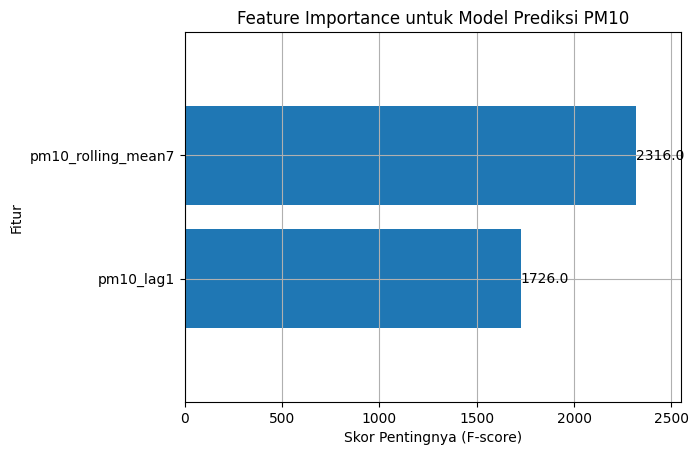

In [44]:
import xgboost as xgb

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, height=0.8)
plt.title('Feature Importance untuk Model Prediksi PM10')
plt.xlabel('Skor Pentingnya (F-score)')
plt.ylabel('Fitur')
plt.show()

**PENGGUNAAN AI IBM GRANITE UNTUK ANALISIS**

In [57]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [70]:
artikel1 = [
"""
pada Rabu (24/7) dalam kategori tanda warna Merah. Berdasarkan data Real-time Air Quality Index (AQI), Konsentrasi PM2.5 di udara Jakarta saat ini 13,4 kali dari nilai pedoman standar kualitas udara tahunan World Health Organization (WHO). Menyelisik laman iqair pukul 17.30 WIB masih didominasi Merah. Kondisi ini berarti kualitas udara Jakarta dalam kategori 'Tidak Sehat'. Status polusi udara tersebut harus menjadi perhatian Warga dan Lembaga terkait. Apalagi, wilayah Ibu Kota hari ini tercatat memiliki Indeks Kualitas Udara dengan 159 AQI. Kualitas udara masih bisa berubah dengan tingkat polusi lebih tinggi. Maka, kamu disarankan memakai masker saat keluar rumah. Atau menghindari kegiatan outdoor.
"""
]

In [81]:
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(artikel1)])

prompt = f"""
Tolong lakukan dua hal berikut dengan tepat:

1.  **Identifikasi Penyebab Utama Polusi:** Baca teksnya dengan saksama dan identifikasi penyebab utama polusi yang dilaporkan. Pilih dua jawaban paling dominan dari daftar ini:
    * Emisi Kendaraan
    * Aktivitas Industri
    * Musim Kemarau
    * Asap Kiriman / Kebakaran Hutan
    * Kondisi Meteorologi (misal: angin, kelembaban)
    * Tidak Diketahui

2.  **Buat Ringkasan Singkat:** Tulis ringkasan dalam dua kalimat yang menjelaskan situasi atau dampak utama polusi udara yang dibahas dalam artikel.
{reviews_text}
"""

response = output.invoke(prompt)
print("Respon dari AI IBM Granite:\n")
print(response)

Respon dari AI IBM Granite:

### Identifikasi Penyebab Utama Polusi:

Berdasarkan Review 1, penyebab utama polusi yang paling dominan yang dilaporkan adalah:

1. **Emisi Kendaraan**: Karena konsentrasi PM2.5 di udara Jakarta yang sangat tinggi (13,4 kali dari nilai pedoman WHO), ini secara utama disebabkan oleh emisi kendaraan yang berlebihan di kota yang bersifat densa.
2. **Kondisi Meteorologi**: Kondisi angin dan kelembaban yang tidak baik juga menyebabkan polusi tersebut tidak cepat hilang, meningkatkan kualitas udara yang 'Tidak Sehat'.

Penyebab lain seperti aktivitas industri, musim kemarau, asap kiriman/kebakaran hutan, dan tidak diketahui tidak disebutkan secara terang-terangan dalam review.

### Buat Ringkasan Singkat:

Kualitas udara Jakarta pada Rabu (24/7) mencapai kategori 'Tidak Sehat' dengan Indeks Kualitas Udara (AQI) 159, yang didominasi konsentrasi PM2.5 13,4 kali dari pedoman WHO. Polusi yang tinggi akibat emisi kendaraan berlebihan dan dibantu oleh kondisi meteorol

In [82]:
artikel2 = [
"""
pada Rabu (3/7) dalam kategori tanda warna Merah. Berdasarkan data Real-time Air Quality Index (AQI), Konsentrasi PM2.5 di udara Jakarta saat ini 6,8 kali dari nilai pedoman standar kualitas udara tahunan World Health Organization (WHO).

Menyelisik laman iqair pukul 15.00 WIB, didominasi Merah. Artinya, kualitas udara Jakarta dalam kategori 'Tidak Sehat'. Status polusi udara tersebut harus menjadi perhatian Warga dan Lembaga terkait. Apalagi, wilayah Ibu Kota hari ini tercatat memiliki Indeks Kualitas Udara dengan 97 AQI.

Kualitas udara masih bisa berubah dengan tingkat polusi lebih tinggi. Maka, kamu disarankan memakai masker saat keluar rumah. Atau menghindari kegiatan outdoor.

Selain itu, tutup jendela atau pintu rumah agar polusi udara tak terlalu masuk ke dalam rumah. Jangan lupa menyalakan air purifier guna membantu menghasilkan kualitas udara lebih layak.
"""
]

In [83]:
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(artikel2)])

prompt = f"""
Tolong lakukan dua hal berikut dengan tepat:

1.  **Identifikasi Penyebab Utama Polusi:** Baca teksnya dengan saksama dan identifikasi penyebab utama polusi yang dilaporkan. Pilih dua jawaban paling dominan dari daftar ini:
    * Emisi Kendaraan
    * Aktivitas Industri
    * Musim Kemarau
    * Asap Kiriman / Kebakaran Hutan
    * Kondisi Meteorologi (misal: angin, kelembaban)
    * Tidak Diketahui

2.  **Buat Ringkasan Singkat:** Tulis ringkasan dalam dua kalimat yang menjelaskan situasi atau dampak utama polusi udara yang dibahas dalam artikel.
{reviews_text}
"""

response = output.invoke(prompt)
print("Respon dari AI IBM Granite:\n")
print(response)

Respon dari AI IBM Granite:

### Identifikasi Penyebab Utama Polusi:

Berdasarkan artikel, penyebab utama polusi udara yang dominan di Jakarta pada hari tersebut adalah:

1. **Emisi Kendaraan**: Dengan konsentrasi PM2.5 yang tinggi, yang banyak disebabkan oleh emisi kendaraan yang berjalan di kota.
2. **Aktivitas Industri**: Diperkirakan juga, karena kualitas udara masih dalam kategori 'Tidak Sehat' dan tidak disebutkan secara langsung bersangkutan dengan musim kemarau atau kebakaran hutan.

### Buat Ringkasan Singkat:

Kualitas udara Jakarta pada Rabu, 3/7, tercatat dalam kategori 'Tidak Sehat' dengan Indeks Kualitas Udara (AQI) 97, yang lebih tinggi dari nilai pedoman WHO. Penyebab utama adalah emisi kendaraan dan aktivitas industri, terutama karena konsentrasi PM2.5 yang tinggi (6,8 kali standar). Peningkatan polusi menyebabkan rekomendasi bagi warga untuk menggunakan masker saat keluar rumah, menghindari kegiatan outdoor, menutup jendela, dan menggunakan air purifier di rumah untuk

In [62]:
artikel3 = [
"""
Kualitas udara Jakarta pada Rabu (31/7/2024) pagi ini masih dalam kategori tidak sehat dan masyarakat disarankan agar mengenakan masker saat keluar rumah.

Demikian disampaikan laman IQAir yang diperbaharui pada pukul 05.00 WIB.

IQAir mencatat kualitas udara Jakarta berada pada poin 167 dengan tingkat konsentrasi polutan PM 2,5 sebesar 78 mikrogram per meter kubik atau 15,6 kali lebih tinggi nilai panduan kualitas udara tahunan Organisasi Kesehatan Dunia (WHO).

Kualitas udara yang sama terjadi sejak Senin, 289 Juli 2024 dengan poin 156, lalu Selasa dengan poin 160.

Adapun PM 2,5 merupakan partikel berukuran lebih lebih kecil 2,5 mikron (mikrometer) yang ditemukan di udara termasuk debu, asap dan jelaga. Paparan partikel ini dalam jangka panjang dikaitkan dengan kematian dini, terutama pada orang yang memiliki penyakit jantung atau paru-paru kronis.

Rekomendasi kesehatan mengingat kualitas udara saat ini selain mengenakan masker saat berada di luar, juga menghindari beraktivitas di luar ruangan, menutup jendela demi menghindari udara luar yang kotor dan menyalakan penyaring udara.

Lalu, bila dibandingkan dengan kota lain di Indonesia, Jakarta tercatat menduduki peringkat ketiga sebagai kota paling berpolusi di Indonesia pada Rabu ini setelah Tangerang (Banten) dengan poin 183 dan Bekasi (Jawa Barat) dengan poin 177.

Pemerintah Provinsi (Pemprov) DKI Jakarta berupaya melakukan sejumlah upaya demi menangani polusi udara di Jakarta salah satunya dengan melakukan uji emisi kendaraan. Tercatat sudah lebih dari sebanyak 100 kali uji emisi dilakukan sejak tahun 2022.

Pemerintah Provinsi (Pemprov) DKI Jakarta pada tahun 2022 melakukan uji emisi sebanyak 24 kali, lalu pada 2023 sebanyak 44 kali, dan tahun ini 44 kali.

Kepala Dinas Lingkungan Hidup (DLH) DKI Jakarta, Asep Kuswanto mengatakan, pengendalian pencemaran udara dilakukan lintas Satuan Kerja Perangkat Daerah (SKPD).

"Misalnya untuk sektor transportasi, itu Dinas perhubungan dengan TransJakarta terus menambah armadanya yang listrik," kata dia di Jakarta, Selasa (30/7).

Lalu, Dinas Pertamanan dan Hutan Kota (Tamhut) DKI Jakarta terus melakukan penanaman pohon dan penambahan ruang terbuka hijau (RTH).

Data tahun 2023 menunjukkan Jakarta memiliki RTH seluas 33,34 juta meter persegi atau 5,2 persen dari total luas wilayah.
"""
]

In [84]:
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(artikel3)])

prompt = f"""
Tolong lakukan dua hal berikut dengan tepat:

1.  **Identifikasi Penyebab Utama Polusi:** Baca teksnya dengan saksama dan identifikasi penyebab utama polusi yang dilaporkan. Pilih dua jawaban paling dominan dari daftar ini:
    * Emisi Kendaraan
    * Aktivitas Industri
    * Musim Kemarau
    * Asap Kiriman / Kebakaran Hutan
    * Kondisi Meteorologi (misal: angin, kelembaban)
    * Tidak Diketahui

2.  **Buat Ringkasan Singkat:** Tulis ringkasan dalam dua kalimat yang menjelaskan situasi atau dampak utama polusi udara yang dibahas dalam artikel.
{reviews_text}
"""

response = output.invoke(prompt)
print("Respon dari AI IBM Granite:\n")
print(response)

Respon dari AI IBM Granite:

1. **Identifikasi Penyebab Utama Polusi:**

   Berdasarkan informasi dalam artikel, penyebab utama polusi udara di Jakarta pada 31 Juli 2024 terutama dikarantuhkan oleh:

   * Emisi Kendaraan: Artikel menyebut pemerintah Provinsi DKI Jakarta melakukan uji emisi kendaraan, sudah dilakukan lebih dari 100 kali sejak 2022.
   * Aktivitas Industri: Meskipun tidak disebut secara langsung, karena Jakarta tercatat sebagai kota paling berpolusi di Indonesia, aktivitas industri yang seringkalan menghasilkan emisi mungkin berkontribusi.

   Dari pilihan, jawaban paling dominan adalah **Emisi Kendaraan** dan **Aktivitas Industri**.

2. **Ringkasan Singkat:**

   Kualitas udara Jakarta pada Rabu, 31 Juli 2024, terklasifikasikan sebagai tidak sehat dengan poin IQAir 167, yang signifikan lebih tinggi dari nilai panduan WHO. Konsentrasi polutan PM2.5 mencapai 78 mikrogram per meter kubik, 15,6 kali lebih tinggi dari batas panduan. Polusi, utamanya dari emisi kendaraan dan 

In [64]:
artikel4 = [
"""
Polusi udara di Jakarta tidak jarang mendapat cap mengkhawatirkan. Bahkan di tengah musim hujan sekarang ini, Jakarta kembali mencapai tingkat PM2.5 yang tinggi pekan ini.
Particulate matter atau PM2.5 adalah partikel udara berukuran lebih kecil dari atau sama dengan 2.5 mikrometer.

Berdasarkan pantauan Badan Meteorologi, Klimatologi, dan Geofisika (BMKG), konsentrasi PM2.5 di Kemayoran periode 1-18 November 2024 mengindikasikan kualitas udara yang dominan berada dalam kategori sedang hingga tidak sehat.

Puncak konsentrasi tertinggi terjadi pada 17 November 2024 pukul 08.00 sebesar 152,7 µg/m3 yang artinya sangat tidak sehat.

BMKG juga mencatat rata-rata konsentrasi PM2.5 harian 60,9 µg/m3, kategori tidak sehat.

Menurut BMKG, seperti dikutip dari unggahan Instagram resmi, konsentrasi PM2.5 cenderung lebih tinggi pada malam hari sampai jelang pagi dikarenakan malam hari udara lebih rapat. Saat malam hari, massa udara turun dan membawa serta polutan.

Kemudian, selepas pagi hari, tingginya aktivitas masyarakat menyebabkan konsentrasi PM2.5 tetap tinggi hingga perlahan turun jelang sore hari.

Sore hari, kondisi atmosfer telah hangat, polutan lebih terangkat ke atas.

Polusi Jakarta Tetap Tinggi, meski Hujan
Hujan berperan penting mengurangi polusi udara di Jakarta dengan adanya proses yang dinamakan rain washing (pencucian udara).

Pencucian udara adalah proses ketika air hujan yang turun ikut menangkap dan melarutkan partikel polutan. Hal ini dikenal sebagai proses wet deposition, yakni partikel seperti debu dan PM2.5/PM10 diendapkan ke permukaan tanah.

Meskipun begitu, jika hujan cukup rendah atau tidak merata, efek hujan dalam membersihkan polusi tidaklah signifikan.

Curah hujan dapat menurunkan konsentrasi PM10 dengan korelasi -0,501. Namun, jika hanya mengandalkan curah hujan, dibutuhkan 271 mm curah hujan untuk betul-betul membersihkan polutan di Jakarta.

Pada 16-17 November 2024, BMKG mencatat labilitas udara di Jakarta cenderung stabil-lemah pada dini hingga pagi hari. Ada waktu-waktu udara lebih stabil, sehingga sulit bergerak ke lapisan lebih tinggi.

Hal itu dapat membuat partikel polusi terperangkap di lapisan bawah, bahkan setelah hujan turun.

Sementara, berdasarkan pengamatan di Stasiun Meteorologi Kemayoran, hujan turun pada 3, 4, 6, 12, 13, dan 16 November 2024. Kendati begitu, hujan yang turun lebih dari 10 mm hanya terjadi pada 3, 4, dan 6 November 2024.

Pada tanggal tersebut kategori PM per jam didominasi kategori sedang.
"""
]

In [85]:
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(artikel4)])

prompt = f"""
Tolong lakukan dua hal berikut dengan tepat:

1.  **Identifikasi Penyebab Utama Polusi:** Baca teksnya dengan saksama dan identifikasi penyebab utama polusi yang dilaporkan. Pilih dua jawaban paling dominan dari daftar ini:
    * Emisi Kendaraan
    * Aktivitas Industri
    * Musim Kemarau
    * Asap Kiriman / Kebakaran Hutan
    * Kondisi Meteorologi (misal: angin, kelembaban)
    * Tidak Diketahui

2.  **Buat Ringkasan Singkat:** Tulis ringkasan dalam dua kalimat yang menjelaskan situasi atau dampak utama polusi udara yang dibahas dalam artikel.
{reviews_text}
"""

response = output.invoke(prompt)
print("Respon dari AI IBM Granite:\n")
print(response)

Respon dari AI IBM Granite:

### 1. Identifikasi Penyebab Utama Polusi:

Berdasarkan artikel, penyebab utama polusi udara di Jakarta dapat diidentifikasi sebagai berikut:

1. **Emisi Kendaraan**: Kendaraan bermotor merupakan sumber emisi utama, karena aktivitas transportasi intensif di kota.
2. **Kondisi Meteorologi (misal: angin, kelembaban)**: Kelembaban udara, kelembaban, dan angin berperan dalam mengumpulkan dan menghalang pencucian udara, meningkatkan konsentrasi polutan.

Penyebab lain, seperti aktivitas industri, musim kemarau, asap kiriman/kebakaran hutan, dan tidak diketahui, tidak disebutkan secara utama dalam artikel tersebut.

### 2. Ringkasan Singkat:

Polusi udara di Jakarta tetap tinggi, meski ada hujan. Konsentrasi partikel udara (PM2.5) berada dalam kategori tidak sehat, terutama pada malam hari dan pagi. Proses pencucian udara oleh hujan tidak bekerja dengan baik karena curah hujan yang rendah dan stabilitas udara yang lemah, yang membuat polutan terperangkap di lapis

In [67]:
artikel5 = [
"""
Kualitas udara di DKI Jakarta pada Sabtu (1/6/2024) pagi menjadi yang terburuk kedua di dunia. Hal ini berdasarkan data situs pemantau kualitas udara IQAir.

Berdasarkan pantauan pada pukul 05:00 WIB, indeks kualitas udara (AQI) di Jakarta berada di angka 186 dengan angka partikel halus (particulate matter/PM) 2.5, yang berarti masuk kategori tidak sehat.

Sementara pada data itu menyebutkan kota dengan kualitas udara terburuk di dunia pada Delhi, India dengan indeks kualitas udara di angka 275. Kemudian di urutan ketiga ada Kinshasa, Kongo di angka 172, kemudian diikuti Kumpala, Uganda di angka 163.

Berbeda dengan angka yang ditunjukkan IQAir, Sistem Informasi Lingkungan dan Kebersihan Dinas Lingkungan Hidup Provinsi DKI Jakarta menunjukkan bahwa kualitas udara di Jakarta berada pada kategori sedang.

Kategori kualitas udara tersebut berarti Tingkat kualitas udara yang tidak berpengaruh pada kesehatan manusia ataupun hewan tetapi berpengaruh pada tumbuhan yang sensitif, dan nilai estetika.
"""
]

In [86]:
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(artikel5)])

prompt = f"""
Tolong lakukan dua hal berikut dengan tepat:

1.  **Identifikasi Penyebab Utama Polusi:** Baca teksnya dengan saksama dan identifikasi penyebab utama polusi yang dilaporkan. Pilih dua jawaban paling dominan dari daftar ini:
    * Emisi Kendaraan
    * Aktivitas Industri
    * Musim Kemarau
    * Asap Kiriman / Kebakaran Hutan
    * Kondisi Meteorologi (misal: angin, kelembaban)
    * Tidak Diketahui

2.  **Buat Ringkasan Singkat:** Tulis ringkasan dalam dua kalimat yang menjelaskan situasi atau dampak utama polusi udara yang dibahas dalam artikel.
{reviews_text}
"""

response = output.invoke(prompt)
print("Respon dari AI IBM Granite:\n")
print(response)

Respon dari AI IBM Granite:

### Identifikasi Penyebab Utama Polusi:

Berdasarkan artikel, situasi polusi di Jakarta yang sangat buruk terutama disebabkan oleh **emisi kendaraan** dan **aktivitas industri**. Dari data IQAir, indeks kualitas udara (AQI) di Jakarta mencapai angka 186, yang sangat tinggi, di mana partikel halus (PM2.5) melebihi batas yang tidak sehat. Sementara, Sistem Informasi Lingkungan dan Kebersihan Dinas Lingkungan Hidup Provinsi DKI Jakarta menunjukkan kategori kualitas udara sebagai sedang, yang berarti tidak berpengaruh pada kesehatan manusia atau hewan, tetapi memiliki dampak terhadap tumbuhan sensitif dan nilai estetika.

### Ringkasan Singkat:

Kualitas udara di Jakarta pada Sabtu, 1 Jun 2024, menjadi terburuk kedua di dunia dengan indeks AQI mencapai 186, terutama akibat emisi kendaraan dan aktivitas industri. Meskipun ini mencapai kategori "tidak sehat" sesuai IQAir, Dinas Lingkungan DKI Jakarta mengklasifikasikannya sebagai "sedang," yang tidak mempunyai da

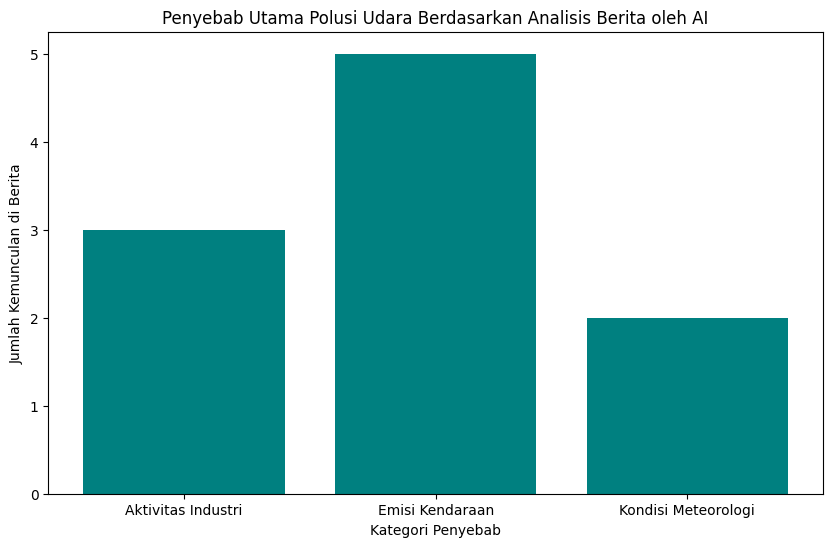

In [87]:
penyebab = {
    'Aktivitas Industri': 3,
    'Emisi Kendaraan': 5,
    'Kondisi Meteorologi': 2
}

plt.figure(figsize=(10, 6))
plt.bar(penyebab.keys(), penyebab.values(), color='teal')
plt.title('Penyebab Utama Polusi Udara Berdasarkan Analisis Berita oleh AI')
plt.xlabel('Kategori Penyebab')
plt.ylabel('Jumlah Kemunculan di Berita')
plt.show()